In [26]:
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)


In [4]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
ppn = Perceptron(max_iter = 40, eta0 = 0.01,random_state = 0)
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.01, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [6]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [7]:
accuracy_score(y_test,y_pred)

0.91111111111111109

In [8]:
def plot_decision_region(X, y, classifier, test_idx = None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidths=1, marker='o', s=55, label='test set')

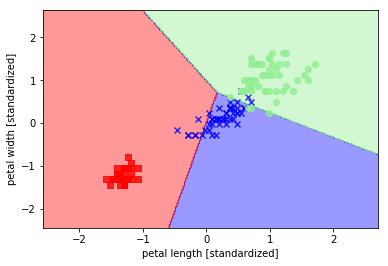

In [9]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_region(X_combined_std,y_combined, test_idx=range(105,150), classifier = ppn)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()

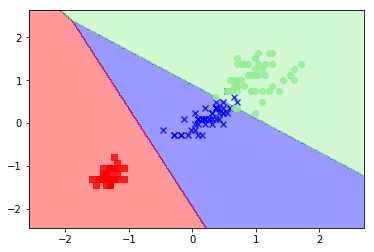

In [10]:
lr = LogisticRegression(C=1000.0, random_state = 0)
lr.fit(X_train_std,y_train)
plot_decision_region(X_combined_std,y_combined, classifier=lr,test_idx = range(105,150))
plt.show()

In [11]:
help(lr.predict_proba)

Help on method predict_proba in module sklearn.linear_model.logistic:

predict_proba(X) method of sklearn.linear_model.logistic.LogisticRegression instance
    Probability estimates.
    
    The returned estimates for all classes are ordered by the
    label of classes.
    
    For a multi_class problem, if multi_class is set to be "multinomial"
    the softmax function is used to find the predicted probability of
    each class.
    Else use a one-vs-rest approach, i.e calculate the probability
    of each class assuming it to be positive using the logistic function.
    and normalize these values across all the classes.
    
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
    
    Returns
    -------
    T : array-like, shape = [n_samples, n_classes]
        Returns the probability of the sample for each class in the model,
        where classes are ordered as they are in ``self.classes_``.



# Support Vector Machine


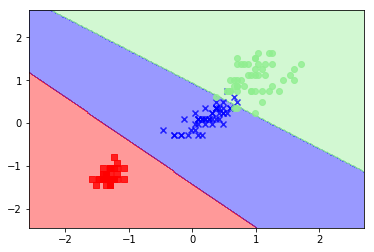

In [12]:
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_region(X_combined_std,y_combined, classifier=svm,test_idx=range(105,150))
plt.show()

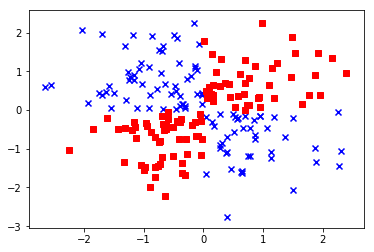

In [13]:
np.random.seed(0)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]> 0,X_xor[:,1]>0)
y_xor = np.where(y_xor,1,-1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')

[]

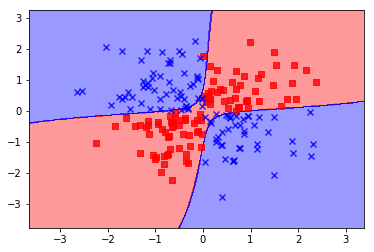

In [14]:
svm = SVC(kernel='rbf',random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor,y_xor)
plot_decision_region(X_xor,y_xor,classifier=svm)
plt.plot()

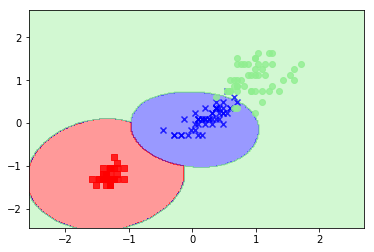

In [15]:
svm = SVC(kernel='rbf', random_state=0, gamma=01.10, C=10.0)
svm.fit(X_train_std, y_train)
plot_decision_region(X_combined_std,y_combined, classifier=svm, test_idx = range(105,150))
plt.show()

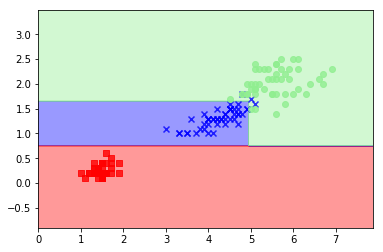

In [16]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state = 0)
tree.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))
plot_decision_region(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.show()

In [17]:
#export_graphviz(tree,out_file='tree.dot',feature_names=['petal length', 'petal width'])

# Random Forest Classifier


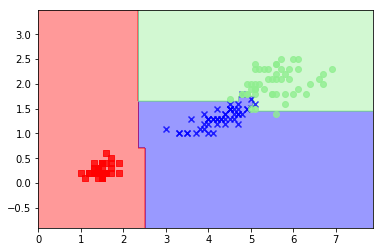

In [25]:
forest = RandomForestClassifier(criterion = 'entropy', n_estimators=10, random_state = 1, n_jobs = 2)
#random forest from 10 decision trees via the n_estimators
#n_jobs -> allows us to parallelize the model training using multiple cores of our computer (here, two).
forest.fit(X_train, y_train)
plot_decision_region(X_combined, y_combined, classifier= forest, test_idx = range(105,150))
plt.show()

# K-Nearest Neighbors

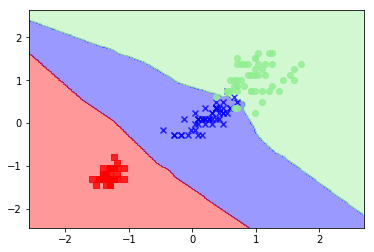

In [27]:
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(X_train_std,y_train)
plot_decision_region(X_combined_std,y_combined,classifier=knn,test_idx=range(105,150))
plt.show()